In [2]:
!pip install networkx

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ------------------------------------ --- 1.8/2.0 MB 18.2 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 16.3 MB/s  0:00:00


In [1]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------------- ------------ 5.5/8.1 MB 32.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 39.6 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 21.1 MB/s  0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 12.8/12.8 MB 92.2 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 84.9 MB/s  0:00:00

   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   --

In [26]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
with open("chatcontroldenmarkquery.json", "r") as file:
    data = json.load(file)
    data = data["data"]
    data = data["children"]


In [24]:
data[0]["data"]["subreddit"]

'Denmark'

In [33]:
for i in data:
    print(i["data"]["subreddit"])
    break

Denmark


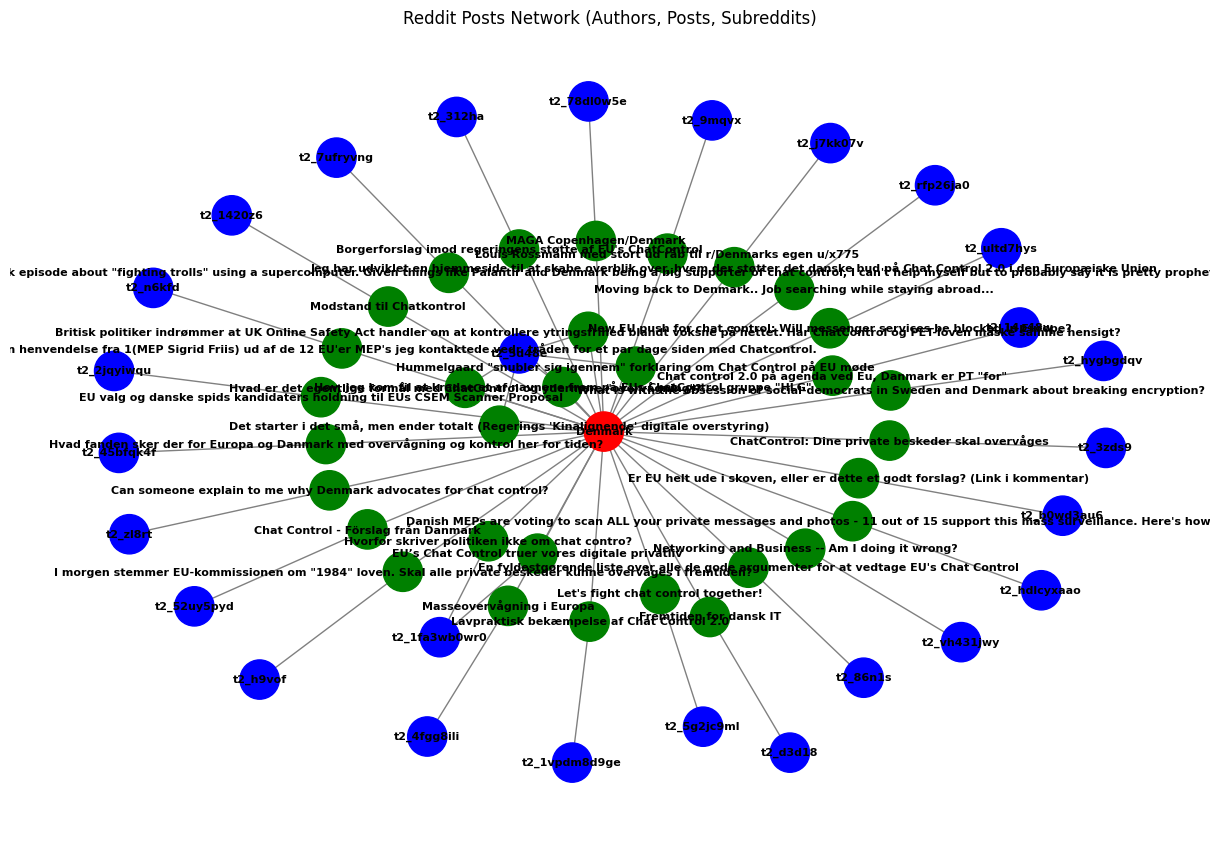

In [36]:
# Create a graph
G = nx.Graph()

# Loop through all posts
for post in data:
    subreddit = post["data"]["subreddit"]
    author = post["data"]["author_fullname"]
    title = post["data"]["title"]

    if not (subreddit and author and title):
        continue  # skip incomplete entries

    # Add nodes
    G.add_node(subreddit, type="subreddit")
    G.add_node(author, type="user")
    G.add_node(title, type="post")

    # Add edges
    G.add_edge(author, title)      # author wrote post
    G.add_edge(title, subreddit)   # post belongs to subreddit

# Draw network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Color nodes by type
colors = []
for node, attrs in G.nodes(data=True):
    if attrs["type"] == "subreddit":
        colors.append("red")
    elif attrs["type"] == "user":
        colors.append("blue")
    else:
        colors.append("green")

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=colors,
    node_size=800,
    font_size=8,
    font_weight="bold",
    edge_color="gray"
)

plt.title("Reddit Posts Network (Authors, Posts, Subreddits)")
plt.show()
